<a href="https://colab.research.google.com/github/roksanakanicka/Predicting_Student_Test_Scores/blob/main/EDA_Predicting_Student_Test_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explanatory Data Analysis

### Imports

In [19]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

### Wczytanie danych

In [20]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
original_set = pd.read_csv('Exam_Score_Prediction.csv')

In [21]:
train.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [22]:
test.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
0,630000,24,other,ba,6.85,65.2,yes,5.2,poor,group study,high,easy
1,630001,18,male,diploma,6.61,45.0,no,9.3,poor,coaching,low,easy
2,630002,24,female,b.tech,6.60,98.5,yes,6.2,good,group study,medium,moderate
3,630003,24,male,diploma,3.03,66.3,yes,5.7,average,mixed,medium,moderate
4,630004,20,female,b.tech,2.03,42.4,yes,9.2,average,coaching,low,moderate


In [23]:
original_set.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [24]:
# spójność nazwy ID
if "student_id" in original_set.columns:
    original_set = original_set.rename(columns={"student_id": "id"})

### Braki danych

In [25]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())
print(original_set.isnull().sum().sum())

0
0
0


### Target distribution

### Analiza ekstremów


Rozkład exam_score:
Train skośność:    -0.048
Original skośność: -0.049

Wyniki w zakresie 18-21 (bardzo niskie):
Train:    7877 (1.3%)
Original: 249 (1.2%)

Wyniki > 90 (bardzo wysokie):
Train:    50773 (8.1%)
Original: 1606 (8.0%)


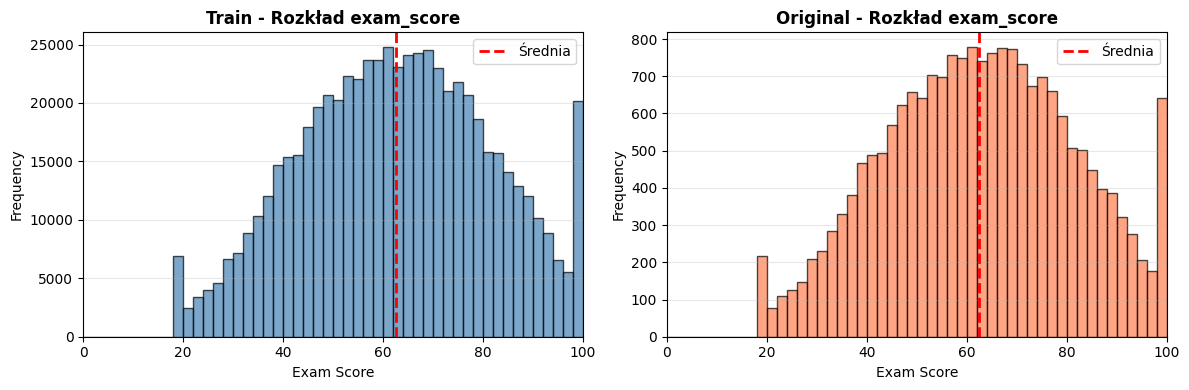

In [26]:
print("\nRozkład exam_score:")
print(f"Train skośność:    {skew(train['exam_score']):.3f}")
print(f"Original skośność: {skew(original_set['exam_score']):.3f}")

print("\nWyniki w zakresie 18-21 (bardzo niskie):")
train_low = ((train['exam_score'] >= 18) & (train['exam_score'] <= 21)).sum()
orig_low = ((original_set['exam_score'] >= 19) & (original_set['exam_score'] <= 21)).sum()
print(f"Train:    {train_low} ({train_low/len(train)*100:.1f}%)")
print(f"Original: {orig_low} ({orig_low/len(original_set)*100:.1f}%)")

print("\nWyniki > 90 (bardzo wysokie):")
train_high = (train['exam_score'] > 90).sum()
orig_high = (original_set['exam_score'] > 90).sum()
print(f"Train:    {train_high} ({train_high/len(train)*100:.1f}%)")
print(f"Original: {orig_high} ({orig_high/len(original_set)*100:.1f}%)")

# Wykres porównawczy
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(train['exam_score'], bins=50, range=(0, 100), edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_title('Train - Rozkład exam_score', fontweight='bold')
axes[0].set_xlabel('Exam Score')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 100)
axes[0].axvline(train['exam_score'].mean(), color='r', linestyle='--', linewidth=2, label='Średnia')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(original_set['exam_score'], bins=50, range=(0, 100), edgecolor='black', alpha=0.7, color='coral')
axes[1].set_title('Original - Rozkład exam_score', fontweight='bold')
axes[1].set_xlabel('Exam Score')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0, 100)
axes[1].axvline(original_set['exam_score'].mean(), color='r', linestyle='--', linewidth=2, label='Średnia')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('distribution_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

In [27]:
# Podział studentów
perfect_students = original_set[original_set['exam_score'] == 100]
top_90_students = original_set[original_set['exam_score'] >= 90]
rest_students = original_set[original_set['exam_score'] < 90]

print(f"Liczba studentów:")
print(f"  Wynik = 100:  {len(perfect_students):>5} ({len(perfect_students)/len(original_set)*100:>4.1f}%)")
print(f"  Wynik ≥ 90:   {len(top_90_students):>5} ({len(top_90_students)/len(original_set)*100:>4.1f}%)")
print(f"  Wynik < 90:   {len(rest_students):>5} ({len(rest_students)/len(original_set)*100:>4.1f}%)")

print("\nPORÓWNANIE ZMIENNYCH NUMERYCZNYCH")

features = ['study_hours', 'class_attendance', 'sleep_hours']

for feat in features:
    perfect_mean = perfect_students[feat].mean()
    top90_mean = top_90_students[feat].mean()
    rest_mean = rest_students[feat].mean()
    print(f"{feat:20s}: 100pkt={perfect_mean:>5.1f}  ≥90pkt={top90_mean:>5.1f}  <90pkt={rest_mean:>5.1f}")

print("\nPORÓWNANIE ZMIENNYCH KATEGORYCZNYCH")

def compare_categorical(col):
    perfect = perfect_students[col].value_counts(normalize=True)
    top90 = top_90_students[col].value_counts(normalize=True)
    rest = rest_students[col].value_counts(normalize=True)

    comparison = pd.DataFrame({
        '100 pkt': perfect,
        '≥90 pkt': top90,
        '<90 pkt': rest
    }).fillna(0)

    print(f"\n{col}:")
    print(comparison.to_string())

compare_categorical('sleep_quality')
compare_categorical('study_method')
compare_categorical('facility_rating')

Liczba studentów:
  Wynik = 100:    493 ( 2.5%)
  Wynik ≥ 90:    1622 ( 8.1%)
  Wynik < 90:   18378 (91.9%)

PORÓWNANIE ZMIENNYCH NUMERYCZNYCH
study_hours         : 100pkt=  6.9  ≥90pkt=  6.7  <90pkt=  3.8
class_attendance    : 100pkt= 84.0  ≥90pkt= 80.8  <90pkt= 69.1
sleep_hours         : 100pkt=  7.7  ≥90pkt=  7.5  <90pkt=  7.0

PORÓWNANIE ZMIENNYCH KATEGORYCZNYCH

sleep_quality:
                100 pkt   ≥90 pkt   <90 pkt
sleep_quality                              
average        0.326572  0.313810  0.336544
good           0.525355  0.502466  0.315812
poor           0.148073  0.183724  0.347644

study_method:
                100 pkt   ≥90 pkt   <90 pkt
study_method                               
coaching       0.436105  0.350801  0.188649
group study    0.146045  0.153514  0.199859
mixed          0.180527  0.205302  0.193764
online videos  0.127789  0.158446  0.207422
self-study     0.109533  0.131936  0.210306

facility_rating:
                  100 pkt   ≥90 pkt   <90 pkt
facility

## ANOVA

In [28]:
# Sprawdzamy wartości na oryginalnym datasecie, ponieważ train i test to dane syntetyczne stworzone z Exam_Score_Prediction.csv

categorical_cols = ['gender', 'course', 'internet_access', 'sleep_quality',
                   'study_method', 'facility_rating', 'exam_difficulty']

results = []
for col in categorical_cols:
    groups = [group['exam_score'].values for name, group in original_set.groupby(col)]
    f_stat, p_value = stats.f_oneway(*groups)
    mean_diff = original_set.groupby(col)['exam_score'].mean().max() - original_set.groupby(col)['exam_score'].mean().min()
    results.append({
        'Feature': col,
        'F-statistic': f_stat,
        'p-value': p_value,
        'Significant': '✓' if p_value < 0.05 else '✗',
        'Max Diff': mean_diff
    })

results_df = pd.DataFrame(results).sort_values('F-statistic', ascending=False)
print("Statistical Significance Test (ANOVA)")
print(results_df.to_string(index=False))
print("\nKolumny z p-value > 0.05:",
      results_df[results_df['Significant'] == '✗']['Feature'].tolist())

Statistical Significance Test (ANOVA)
        Feature  F-statistic       p-value Significant  Max Diff
  sleep_quality   411.793336 5.560728e-176           ✓  9.221016
facility_rating   273.766437 5.050711e-118           ✓  7.571570
   study_method   180.526693 3.198667e-152           ✓  9.821044
internet_access     1.224987  2.683976e-01           ✗  0.413749
         course     0.614432  7.189976e-01           ✗  0.815913
exam_difficulty     0.236966  7.890206e-01           ✗  0.246558
         gender     0.190609  8.264568e-01           ✗  0.184665

Kolumny z p-value > 0.05: ['internet_access', 'course', 'exam_difficulty', 'gender']


## Correlation Matrix

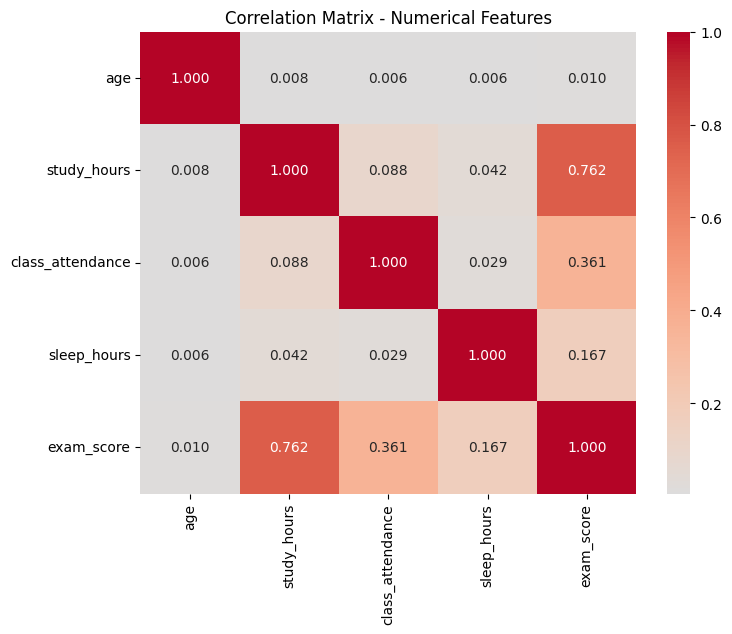


Korelacja z exam_score:
exam_score          1.000000
study_hours         0.762267
class_attendance    0.360954
sleep_hours         0.167410
age                 0.010472
Name: exam_score, dtype: float64


In [29]:
numeric_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']
corr_matrix = train[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Numerical Features')
plt.show()

print("\nKorelacja z exam_score:")
print(corr_matrix['exam_score'].sort_values(ascending=False))

Wnioski:
- gender, course, internet_access, exam_difficulty: p > 0.05 - usuwamy
- study_hours: korelacja 0.72 - najbardziej istotna cecha